In [1]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

F:\programfile\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
F:\programfile\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
F:\programfile\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('imputed_yue.csv')

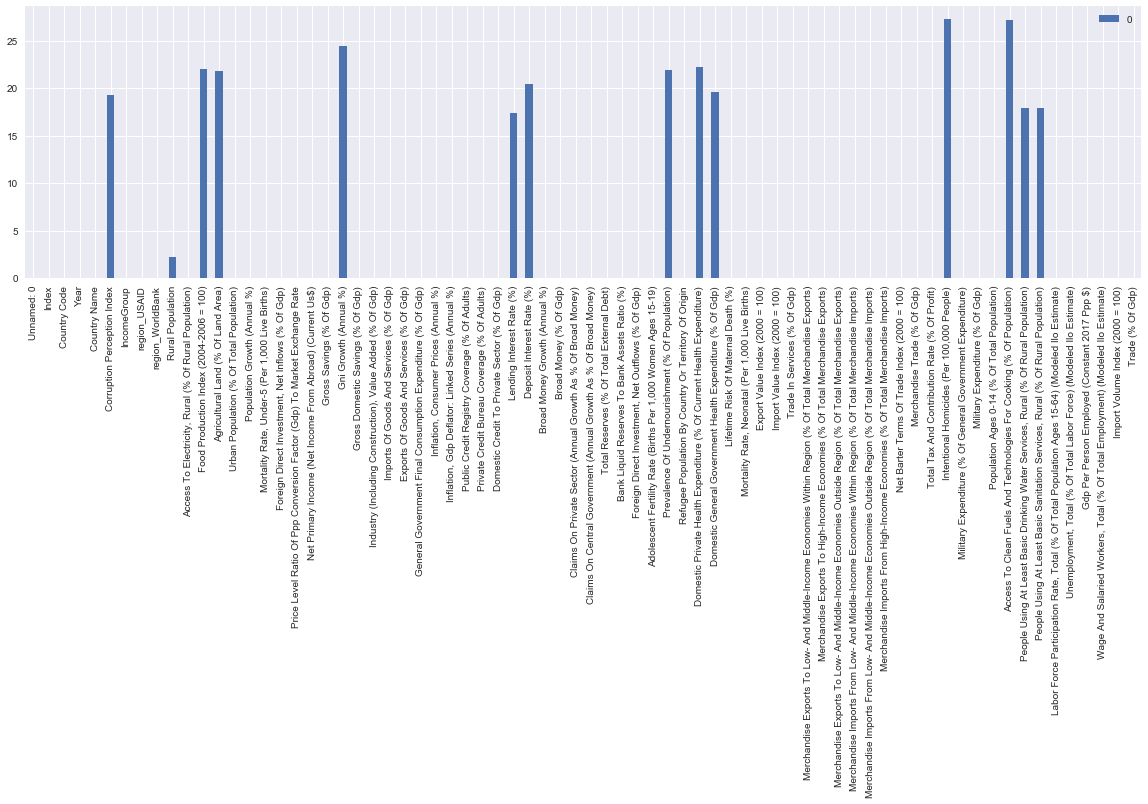

In [3]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

In [4]:
df.columns

Index(['Unnamed: 0', 'Index', 'Country Code', 'Year', 'Country Name',
       'Corruption Perception Index', 'IncomeGroup', 'region_USAID',
       'region_WorldBank', 'Rural Population',
       'Access To Electricity, Rural (% Of Rural Population)',
       'Food Production Index (2004-2006 = 100)',
       'Agricultural Land (% Of Land Area)',
       'Urban Population (% Of Total Population)',
       'Population Growth (Annual %)',
       'Mortality Rate, Under-5 (Per 1,000 Live Births)',
       'Foreign Direct Investment, Net Inflows (% Of Gdp)',
       'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
       'Net Primary Income (Net Income From Abroad) (Current Us$)',
       'Gross Savings (% Of Gdp)', 'Gni Growth (Annual %)',
       'Gross Domestic Savings (% Of Gdp)',
       'Industry (Including Construction), Value Added (% Of Gdp)',
       'Imports Of Goods And Services (% Of Gdp)',
       'Exports Of Goods And Services (% Of Gdp)',
       'General Governm

## Total Reserves (% Of Total External Debt)

In [ ]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Total Reserves (% Of Total External Debt)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Total Reserves (% Of Total External Debt)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Total Reserves (% Of Total External Debt)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Total Reserves (% Of Total External Debt)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Total Reserves (% Of Total External Debt)'], axis = 1)

In [ ]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Total Reserves (% Of Total External Debt)'].isnull(), 
       'Total Reserves (% Of Total External Debt)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Lending Interest Rate (%)

In [8]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Lending Interest Rate (%)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Lending Interest Rate (%)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Lending Interest Rate (%)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Lending Interest Rate (%)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Lending Interest Rate (%)'], axis = 1)

0.9941744636372452


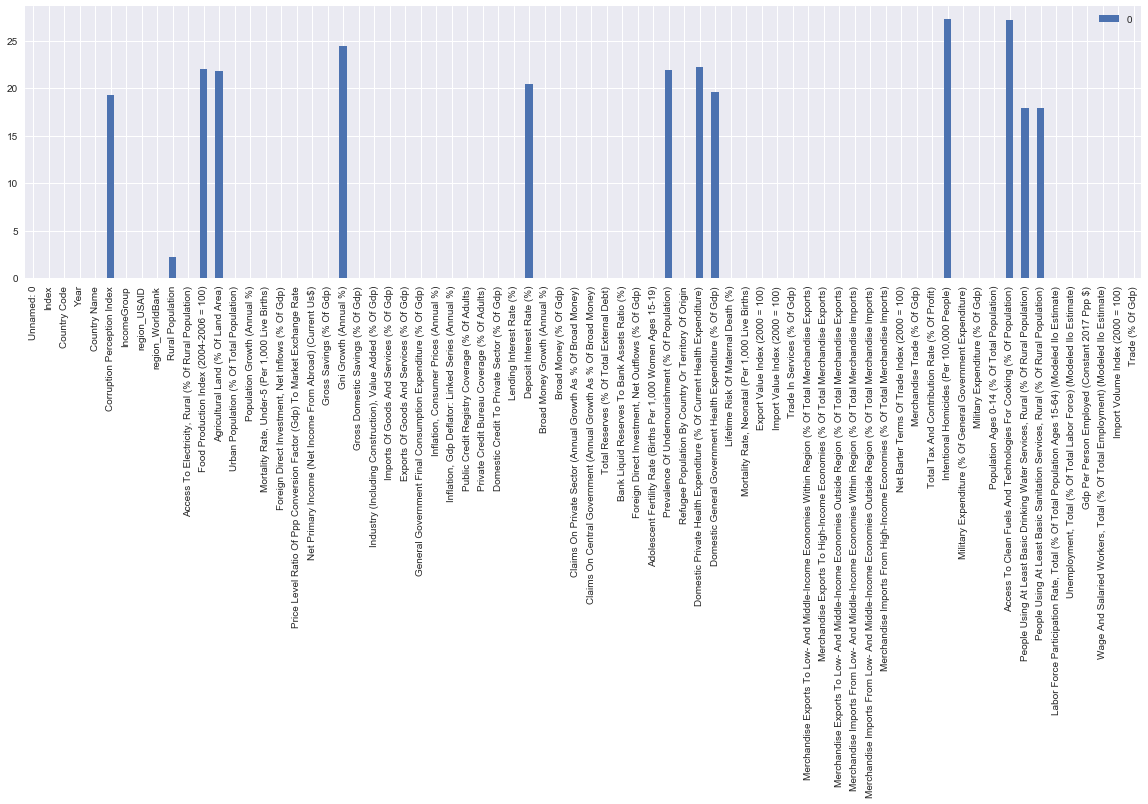

In [9]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Lending Interest Rate (%)'].isnull(), 
       'Lending Interest Rate (%)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)

In [10]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'], axis = 1)

0.9997263051106973


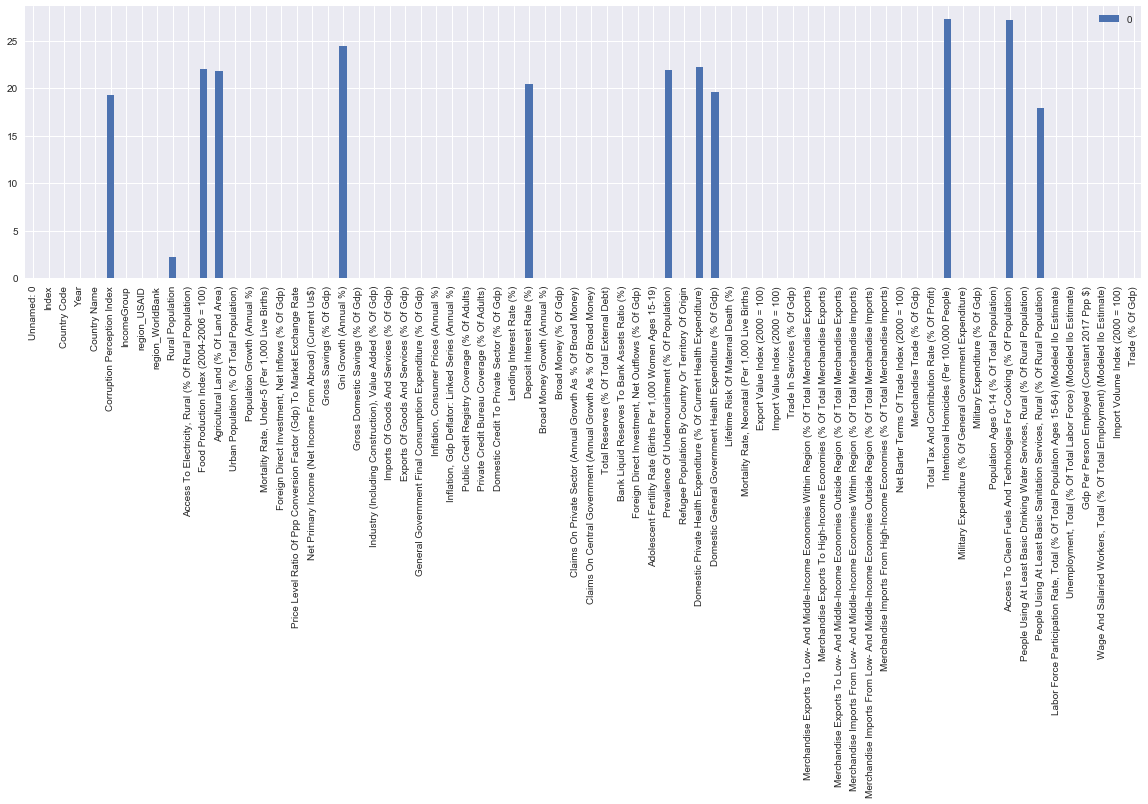

In [11]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'].isnull(), 
       'People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)

In [12]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'], axis = 1)

0.9998554023531353


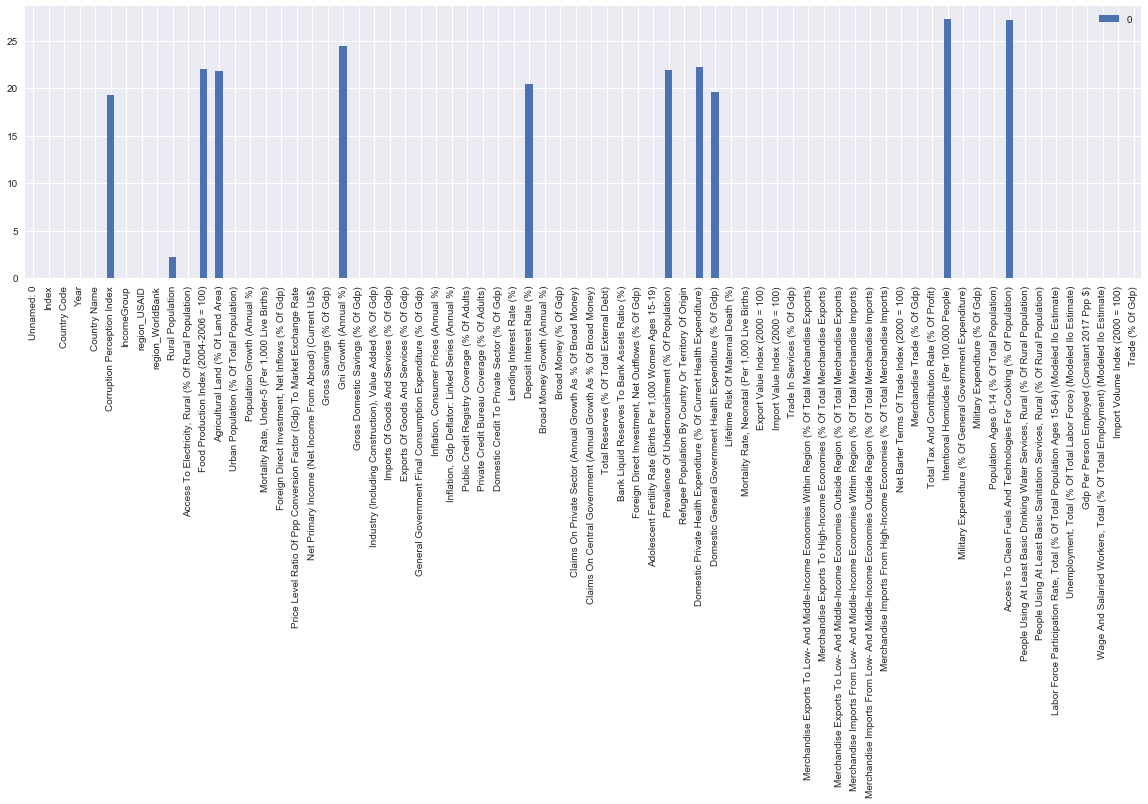

In [13]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'].isnull(), 
       'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Domestic General Government Health Expenditure (% Of Gdp)

In [14]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Domestic General Government Health Expenditure (% Of Gdp)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Domestic General Government Health Expenditure (% Of Gdp)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Domestic General Government Health Expenditure (% Of Gdp)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Domestic General Government Health Expenditure (% Of Gdp)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Domestic General Government Health Expenditure (% Of Gdp)'], axis = 1)

0.999454628646698


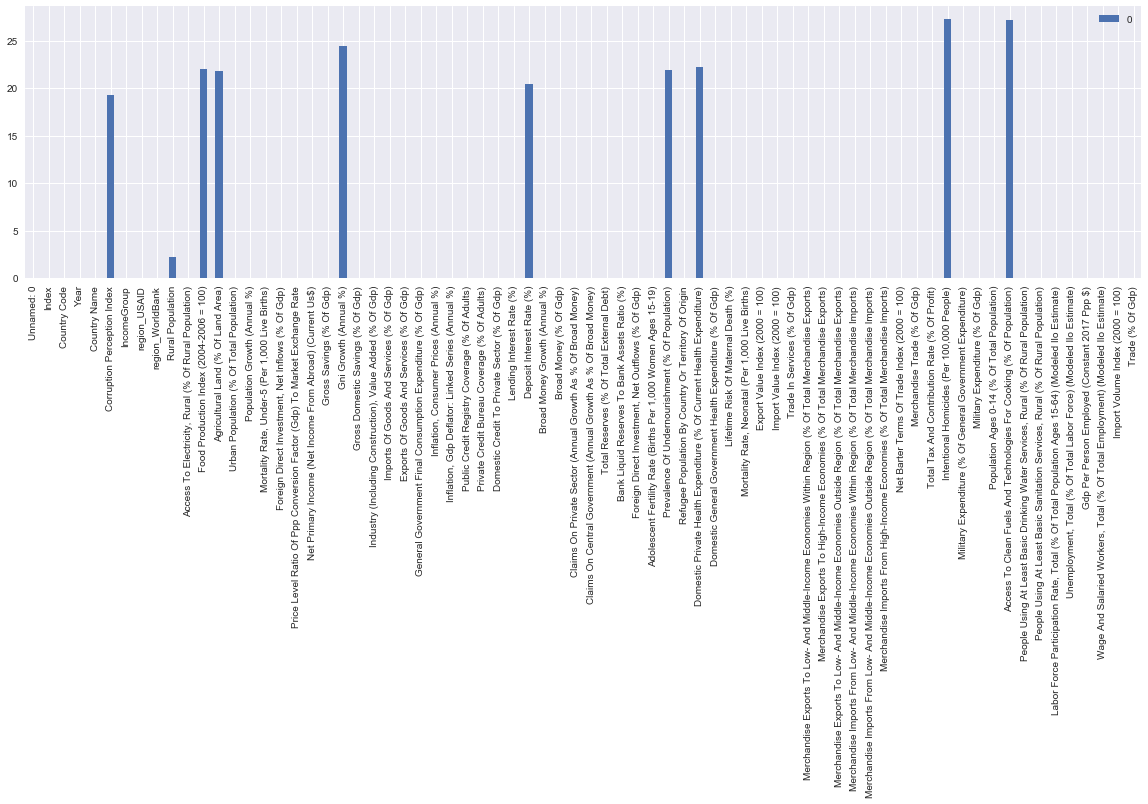

In [15]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Domestic General Government Health Expenditure (% Of Gdp)'].isnull(), 
       'Domestic General Government Health Expenditure (% Of Gdp)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Deposit Interest Rate (%)

In [16]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Deposit Interest Rate (%)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Deposit Interest Rate (%)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Deposit Interest Rate (%)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Deposit Interest Rate (%)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Deposit Interest Rate (%)'], axis = 1)

0.9977378730180803


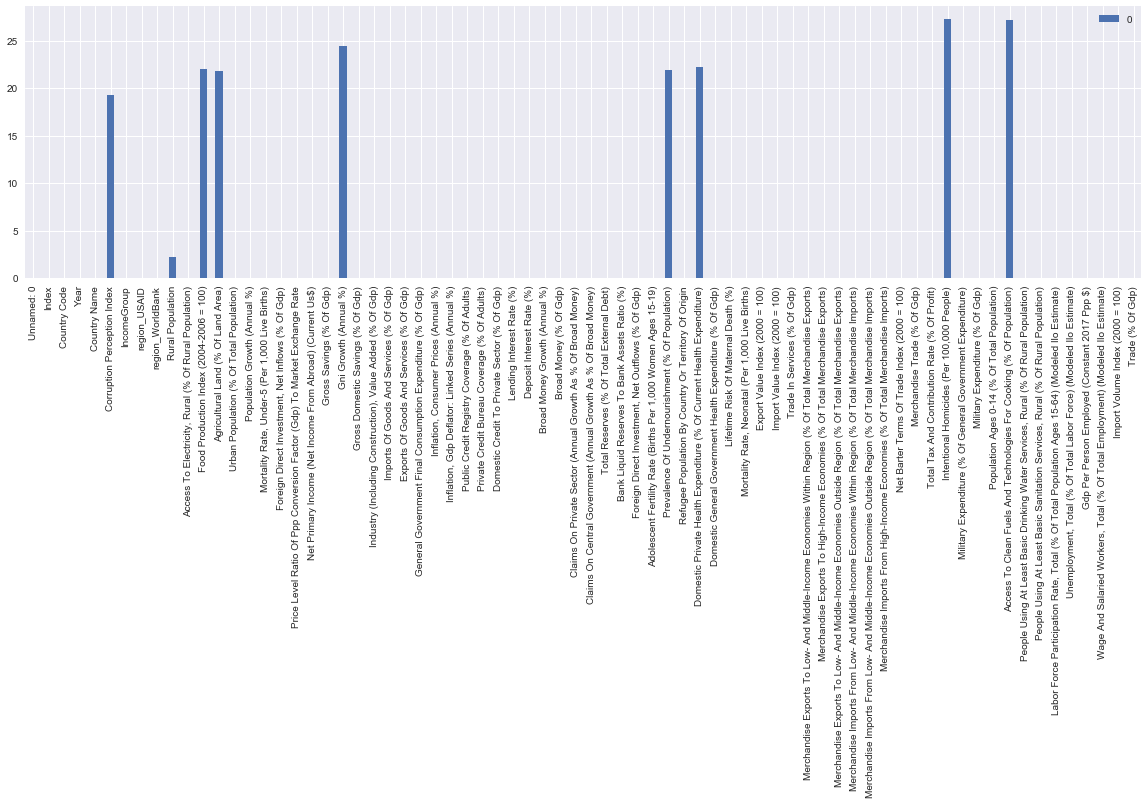

In [17]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Deposit Interest Rate (%)'].isnull(), 
       'Deposit Interest Rate (%)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Agricultural Land (% Of Land Area)

In [18]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Agricultural Land (% Of Land Area)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Agricultural Land (% Of Land Area)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Agricultural Land (% Of Land Area)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Agricultural Land (% Of Land Area)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Agricultural Land (% Of Land Area)'], axis = 1)

0.9995922033217658


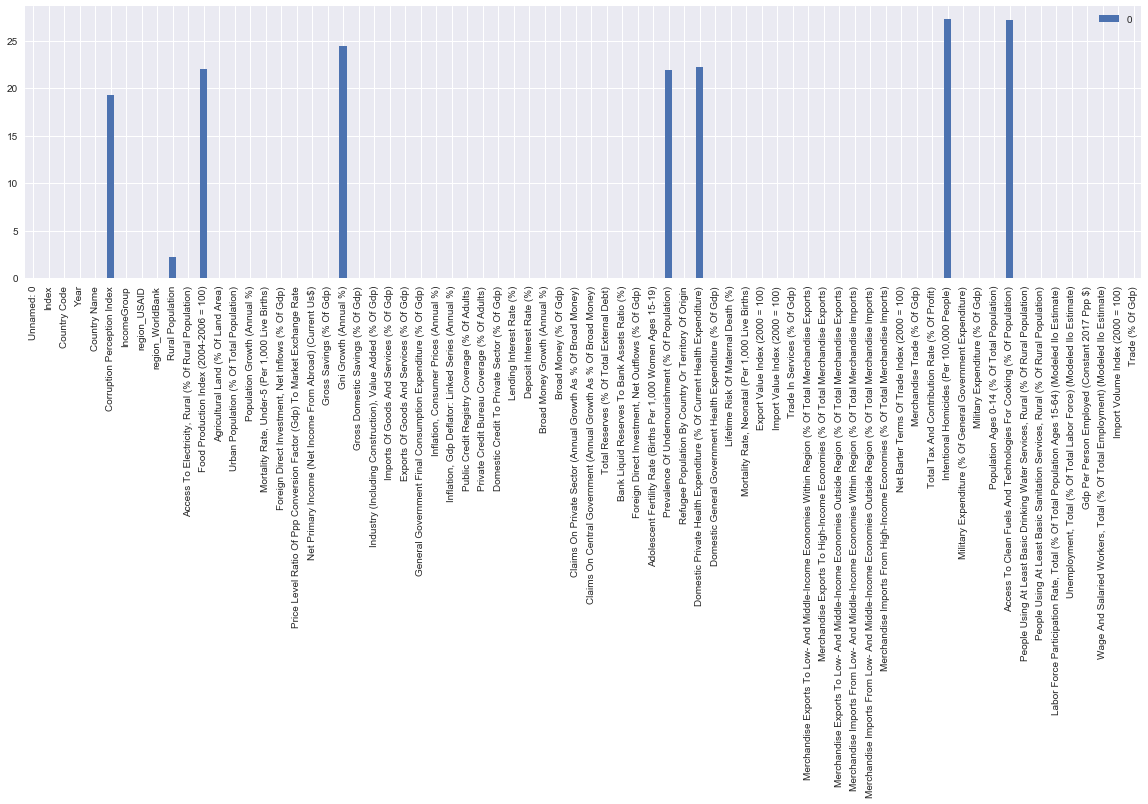

In [19]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Agricultural Land (% Of Land Area)'].isnull(), 
       'Agricultural Land (% Of Land Area)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Prevalence Of Undernourishment (% Of Population)

In [20]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)','Prevalence Of Undernourishment (% Of Population)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Prevalence Of Undernourishment (% Of Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Prevalence Of Undernourishment (% Of Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Prevalence Of Undernourishment (% Of Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Prevalence Of Undernourishment (% Of Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Prevalence Of Undernourishment (% Of Population)'], axis = 1)

0.9992797022590965


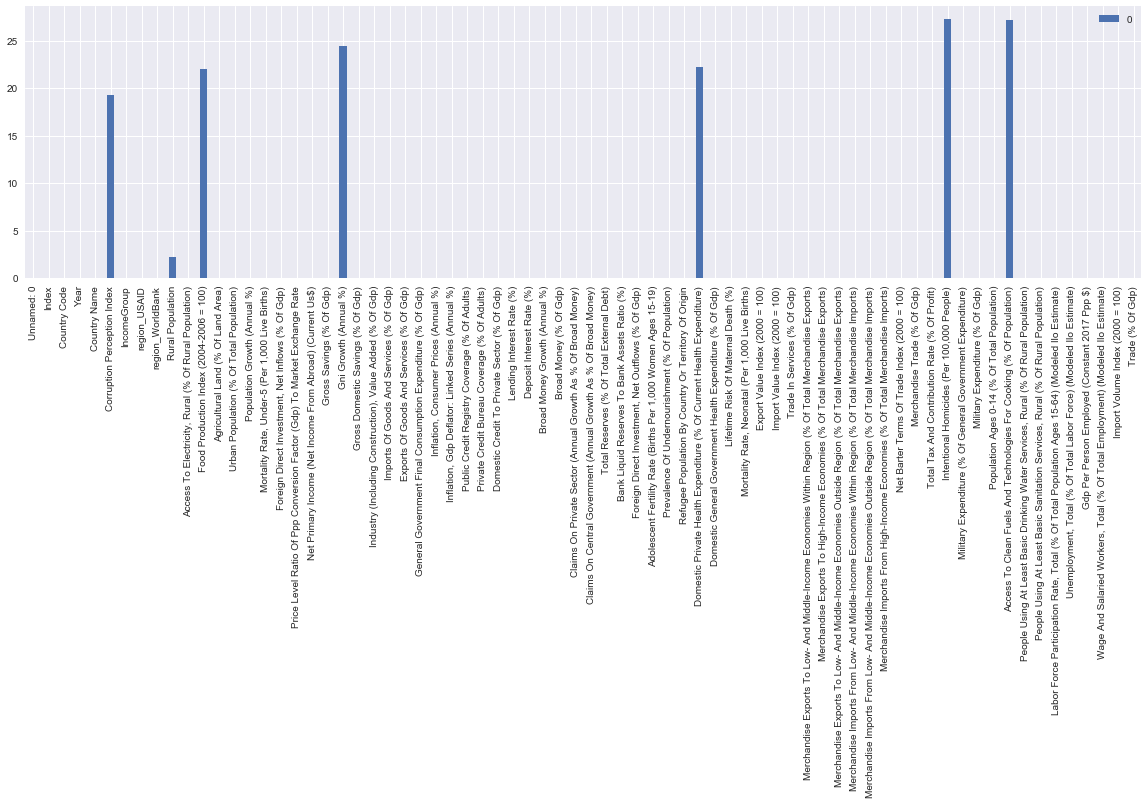

In [21]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Prevalence Of Undernourishment (% Of Population)'].isnull(), 
       'Prevalence Of Undernourishment (% Of Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Food Production Index (2004-2006 = 100)

In [23]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)','Prevalence Of Undernourishment (% Of Population)',
                                   'Food Production Index (2004-2006 = 100)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Food Production Index (2004-2006 = 100)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Food Production Index (2004-2006 = 100)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Food Production Index (2004-2006 = 100)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Food Production Index (2004-2006 = 100)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Food Production Index (2004-2006 = 100)'], axis = 1)

0.9976068833568724


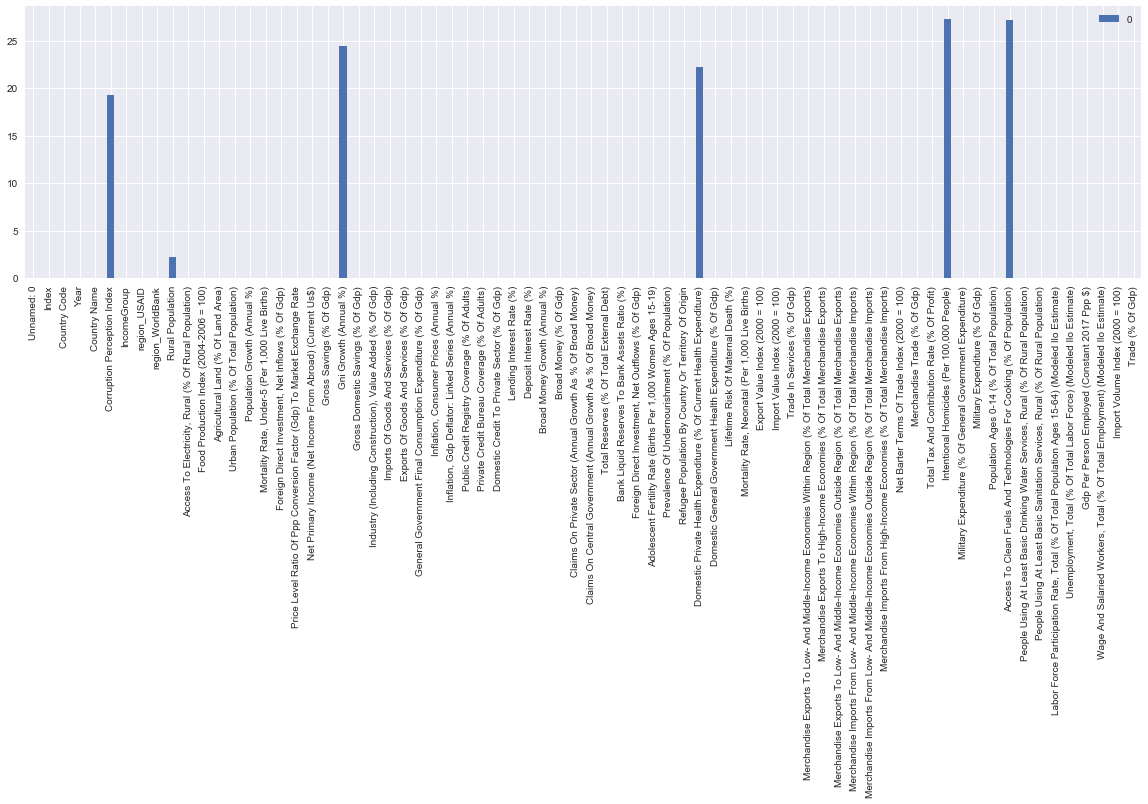

In [24]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Food Production Index (2004-2006 = 100)'].isnull(), 
       'Food Production Index (2004-2006 = 100)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Domestic Private Health Expenditure (% Of Current Health Expenditure)

In [25]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)','Prevalence Of Undernourishment (% Of Population)',
                                   'Food Production Index (2004-2006 = 100)','Domestic Private Health Expenditure (% Of Current Health Expenditure)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Domestic Private Health Expenditure (% Of Current Health Expenditure)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Domestic Private Health Expenditure (% Of Current Health Expenditure)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Domestic Private Health Expenditure (% Of Current Health Expenditure)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Domestic Private Health Expenditure (% Of Current Health Expenditure)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Domestic Private Health Expenditure (% Of Current Health Expenditure)'], axis = 1)

0.9986764479732939


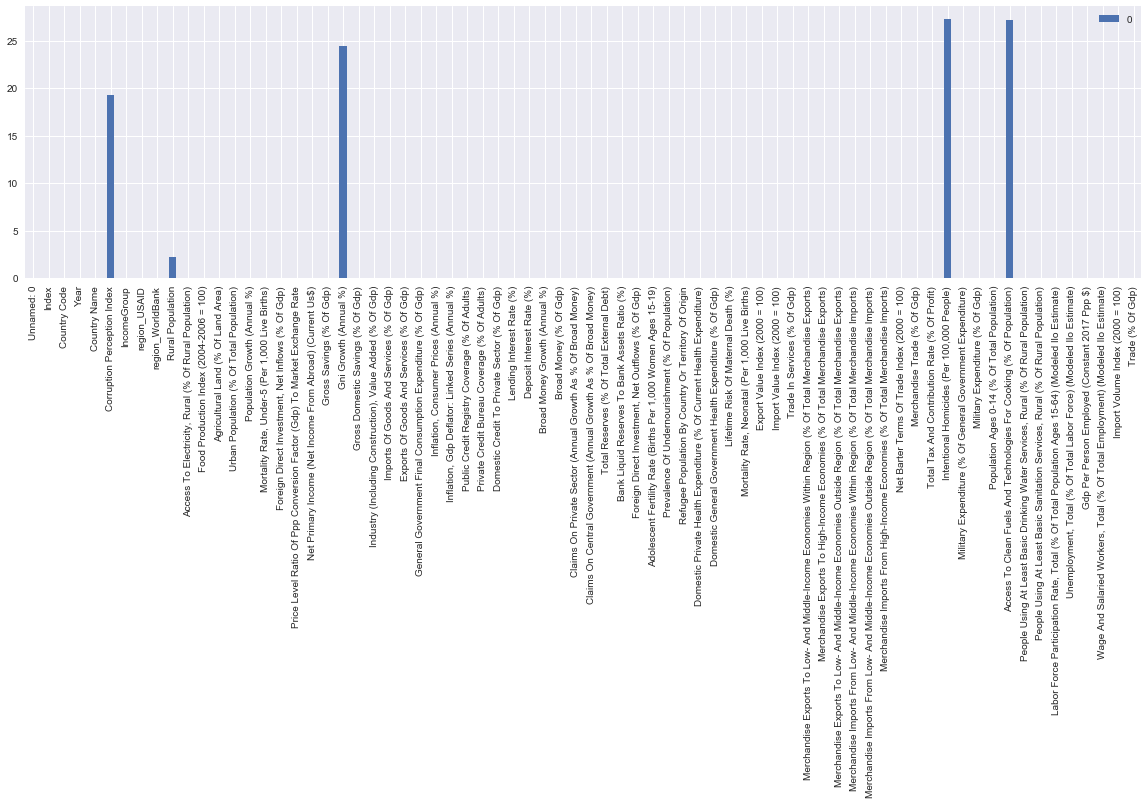

In [26]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Domestic Private Health Expenditure (% Of Current Health Expenditure)'].isnull(), 
       'Domestic Private Health Expenditure (% Of Current Health Expenditure)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Gni Growth (Annual %)

In [27]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)','Prevalence Of Undernourishment (% Of Population)',
                                   'Food Production Index (2004-2006 = 100)','Domestic Private Health Expenditure (% Of Current Health Expenditure)',
                                   'Gni Growth (Annual %)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Gni Growth (Annual %)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Gni Growth (Annual %)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Gni Growth (Annual %)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Gni Growth (Annual %)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Gni Growth (Annual %)'], axis = 1)

0.9929917956883992


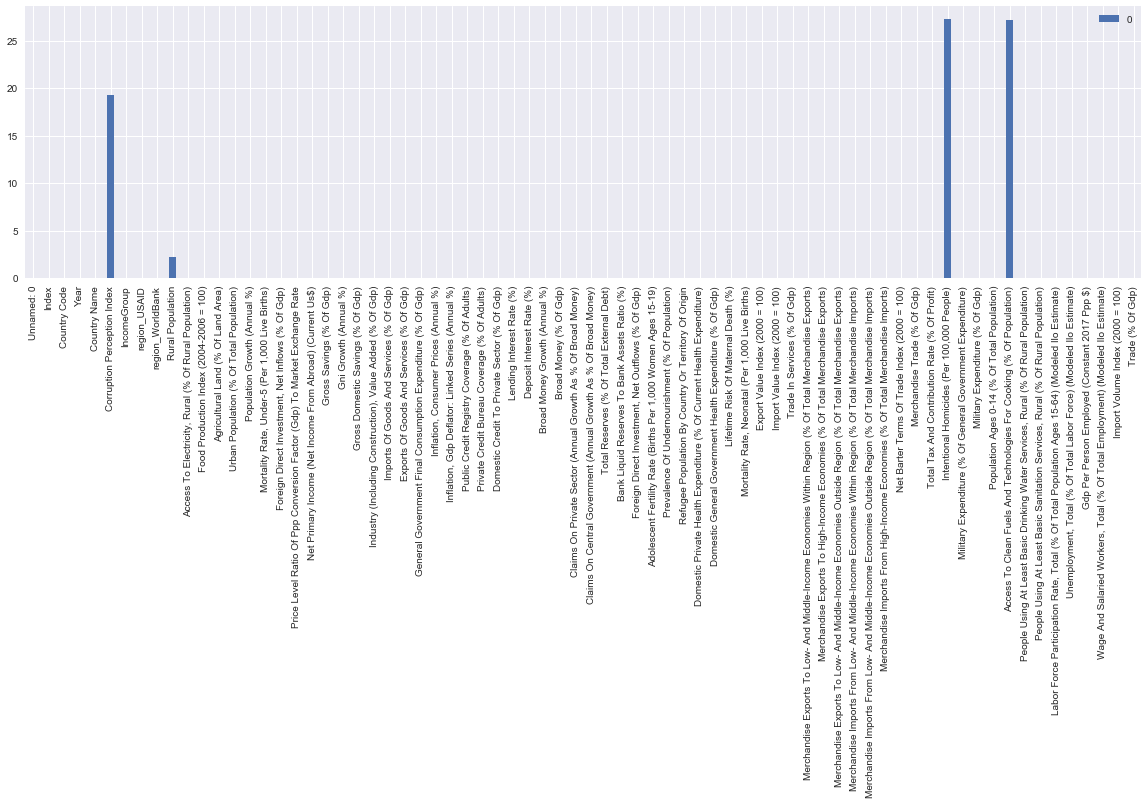

In [28]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Gni Growth (Annual %)'].isnull(), 
       'Gni Growth (Annual %)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Access To Clean Fuels And Technologies For Cooking (% Of Population)

In [29]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)','Prevalence Of Undernourishment (% Of Population)',
                                   'Food Production Index (2004-2006 = 100)','Domestic Private Health Expenditure (% Of Current Health Expenditure)',
                                   'Gni Growth (Annual %)','Access To Clean Fuels And Technologies For Cooking (% Of Population)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Access To Clean Fuels And Technologies For Cooking (% Of Population)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Access To Clean Fuels And Technologies For Cooking (% Of Population)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Access To Clean Fuels And Technologies For Cooking (% Of Population)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Access To Clean Fuels And Technologies For Cooking (% Of Population)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Access To Clean Fuels And Technologies For Cooking (% Of Population)'], axis = 1)

0.999882395290498


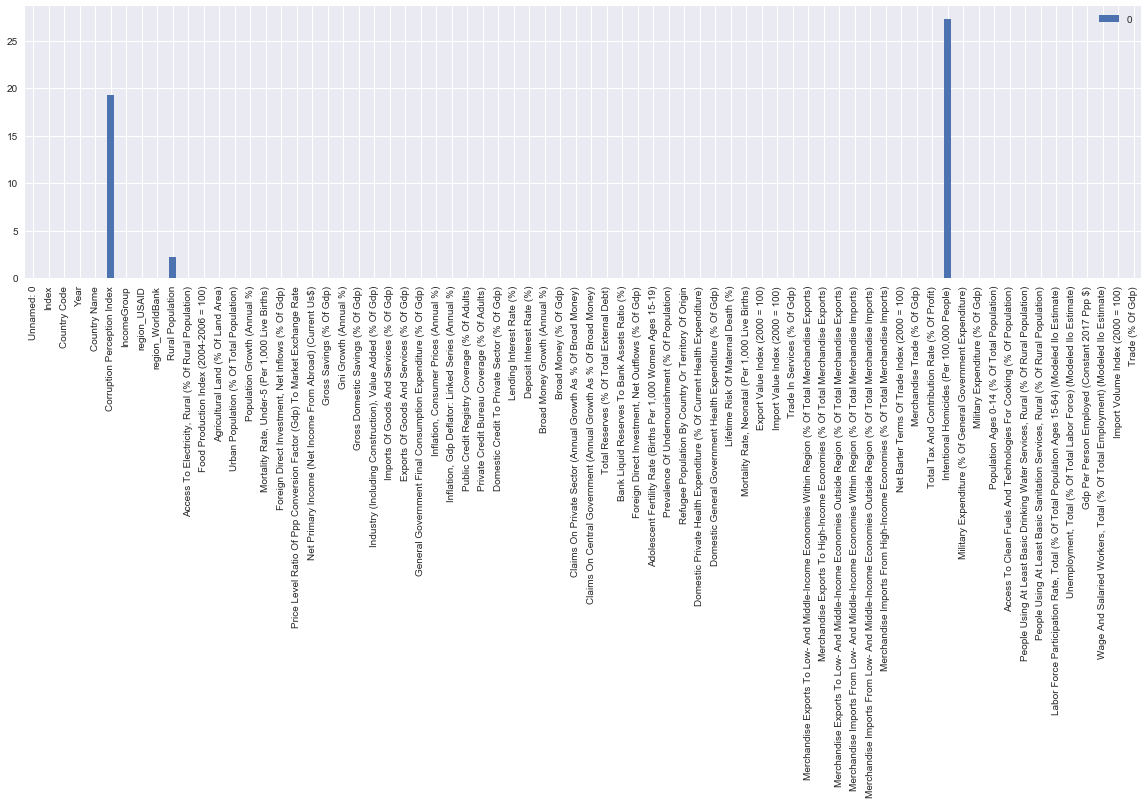

In [30]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Access To Clean Fuels And Technologies For Cooking (% Of Population)'].isnull(), 
       'Access To Clean Fuels And Technologies For Cooking (% Of Population)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Intentional Homicides (Per 100,000 People)

In [31]:
sample_impute = pd.get_dummies(df[['Index', 'Country Name','Year'
    ,'IncomeGroup', 'region_USAID',
       'region_WorldBank',
    'Population Growth (Annual %)',
    'Inflation, Gdp Deflator: Linked Series (Annual %)',
                                   'Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate',
                                   'Gross Domestic Savings (% Of Gdp)',
                                   'General Government Final Consumption Expenditure (% Of Gdp)'
                                  ,'Urban Population (% Of Total Population)','Mortality Rate, Under-5 (Per 1,000 Live Births)','Mortality Rate, Neonatal (Per 1,000 Live Births)',
                                  'Population Ages 0-14 (% Of Total Population)','Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)',
                                  'Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)','Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)',
                                  'Refugee Population By Country Or Territory Of Origin','Inflation, Consumer Prices (Annual %)','Gdp Per Person Employed (Constant 2017 Ppp $)',
                                  'Industry (Including Construction), Value Added (% Of Gdp)','Broad Money (% Of Gdp)','Imports Of Goods And Services (% Of Gdp)',
                                  'Exports Of Goods And Services (% Of Gdp)','Trade (% Of Gdp)',
                                  'Claims On Central Government (Annual Growth As % Of Broad Money)',
                                  'Claims On Private Sector (Annual Growth As % Of Broad Money)',
                                  'Broad Money Growth (Annual %)', 'Trade In Services (% Of Gdp)',
                                  'Net Primary Income (Net Income From Abroad) (Current Us$)',
                                  'Merchandise Trade (% Of Gdp)','Gross Savings (% Of Gdp)',
                                  'Foreign Direct Investment, Net Outflows (% Of Gdp)',
                                  'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)',
                                  'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)',
                                  'Public Credit Registry Coverage (% Of Adults)',
                                  'Private Credit Bureau Coverage (% Of Adults)','Total Tax And Contribution Rate (% Of Profit)',
                                  'Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)',
                                  'Merchandise Imports From Low- And Middle-Income Economies Within Region (% Of Total Merchandise Imports)',
                                  'Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)','Export Value Index (2000 = 100)',
                                  'Import Value Index (2000 = 100)','Net Barter Terms Of Trade Index (2000 = 100)',
                                  'Import Volume Index (2000 = 100)','Bank Liquid Reserves To Bank Assets Ratio (%)',
                                  'Access To Electricity, Rural (% Of Rural Population)','Military Expenditure (% Of General Government Expenditure)',
                                  'Military Expenditure (% Of Gdp)','Domestic Credit To Private Sector (% Of Gdp)','Lifetime Risk Of Maternal Death (%)',
                                   'Total Reserves (% Of Total External Debt)','Lending Interest Rate (%)','People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)',
                                   'People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)','Domestic General Government Health Expenditure (% Of Gdp)',
                                   'Deposit Interest Rate (%)','Agricultural Land (% Of Land Area)','Prevalence Of Undernourishment (% Of Population)',
                                   'Food Production Index (2004-2006 = 100)','Domestic Private Health Expenditure (% Of Current Health Expenditure)',
                                   'Gni Growth (Annual %)','Access To Clean Fuels And Technologies For Cooking (% Of Population)','Intentional Homicides (Per 100,000 People)'
                                  ]])

# Split the data into two datasets
#train
sample_imputeKnown = sample_impute[sample_impute['Intentional Homicides (Per 100,000 People)'].notnull()] # without NaN

#test
sample_imputeUnknown = sample_impute[sample_impute['Intentional Homicides (Per 100,000 People)'].isnull()] #with null values


# splitting the train set into X and y
sample_imputeKnown_X = sample_imputeKnown.drop(['Intentional Homicides (Per 100,000 People)'], axis = 1)
sample_imputeKnown_y = sample_imputeKnown['Intentional Homicides (Per 100,000 People)']

#preparing the test set
sample_imputeUnknown_X = sample_imputeUnknown.drop(['Intentional Homicides (Per 100,000 People)'], axis = 1)

0.9995769130381628


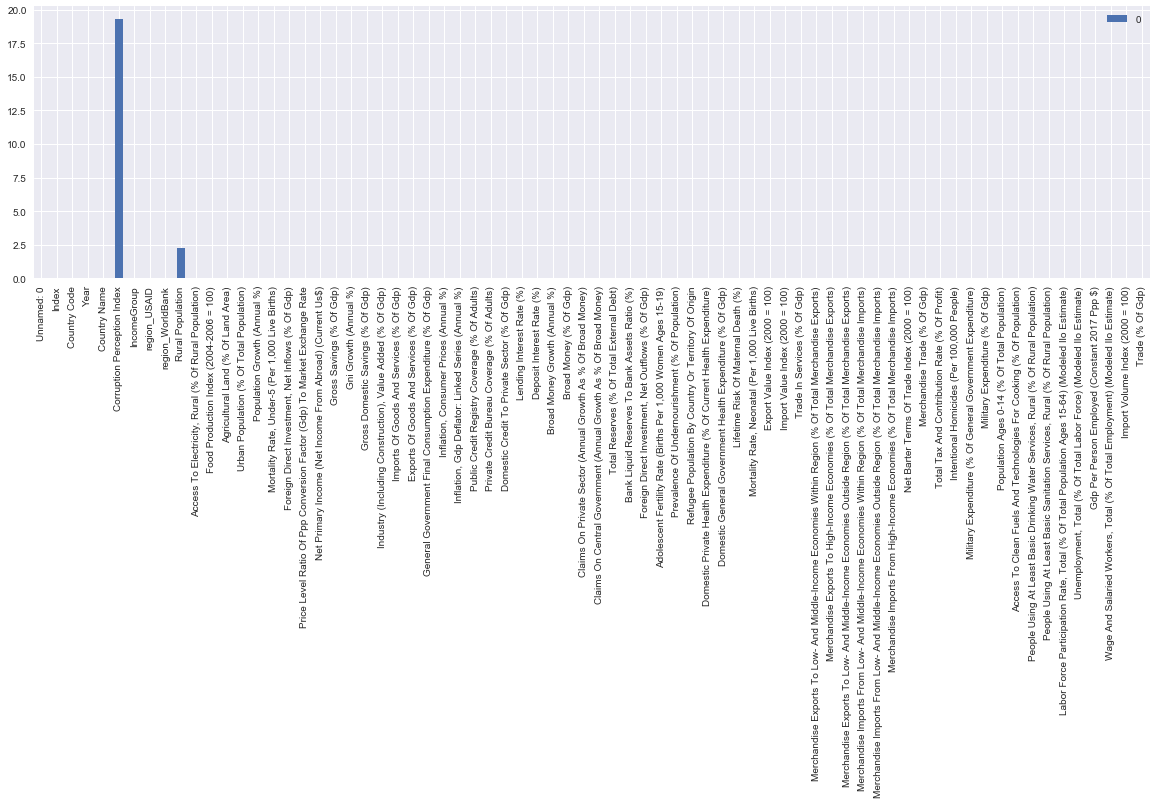

In [32]:
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)

rfr.fit(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y)

print(rfr.score(sample_imputeKnown_X.iloc[:,1:], sample_imputeKnown_y))

#prediction
sample_imputeUnknown_y = rfr.predict(sample_imputeUnknown_X.iloc[:,1:])

df.loc[df['Intentional Homicides (Per 100,000 People)'].isnull(), 
       'Intentional Homicides (Per 100,000 People)'] = sample_imputeUnknown_y

pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

## Rural Population

In [39]:
df.drop(['Rural Population'],axis=1,inplace=True)

In [40]:
final_clean = df
final_clean.to_csv('final_clean.csv')